### 数据集介绍
声呐数据集：60 个输入变量表示声纳从不同角度返回的强度。这是一个二元分类问题（binary classification problem），要求模型能够区分出岩石和金属柱体的不同材质和形状，总共有 208 个观测样本。  

# 0.整体的显示设置

In [1]:
# 优化
# 1.不显示错误警告
import warnings
warnings.filterwarnings('ignore')

# 2.画图过程中的中文显示
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 1.导入数据
可以读取数据文件，也可以连接数据库

In [20]:
# 导入数据
from pandas import read_csv
filename = 'sonar.all-data.csv'
dataset = read_csv(filename, header=None)
print(dataset)

        0          1      2      3      4      5      6      7      8      9   ...         51  \
0    0.020  3.710e-02  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211  ...  2.700e-03   
1    0.045  5.230e-02  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287  ...  8.400e-03   
2    0.026  5.820e-02  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619  ...  2.320e-02   
3    0.010  1.710e-02  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126  ...  1.210e-02   
4    0.076  6.660e-02  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446  ...  3.100e-03   
5    0.029  4.530e-02  0.028  0.017  0.038  0.099  0.120  0.183  0.210  0.304  ...  4.500e-03   
6    0.032  9.560e-02  0.132  0.141  0.167  0.171  0.073  0.140  0.208  0.351  ...  2.010e-02   
7    0.052  5.480e-02  0.084  0.032  0.116  0.092  0.103  0.061  0.146  0.284  ...  8.100e-03   
8    0.022  3.750e-02  0.048  0.048  0.065  0.059  0.075  0.010  0.068  0.149  ...  1.450e-02   
9    0.016  1.730e-02  0.035  

# 2.查看数据
查看数据维度，查看数据类型

In [21]:
from pandas import set_option
from matplotlib import pyplot

# 数据维度
print('1.数据维度')
print(dataset.shape)

# 查看数据类型
# set_option('display.max_rows', 500)
print("2.数据类型")
print(dataset.dtypes)

# 查看最初的20条记录
# set_option('display.width', 100)
print("3.查看前20条记录")
print(dataset.head(20))

# 描述性统计信息
# set_option('precision', 3)
print("4.查看统计信息")
print(dataset.describe())

# 数据的分类分布
print(dataset.groupby(60).size())

1.数据维度
(208, 61)
2.数据类型
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object
3.查看前20条记录
       0      1      2      3      4      5      6      7      8      9   ...     51     52  \
0 

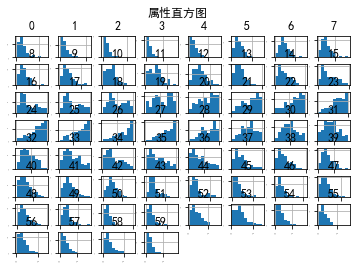

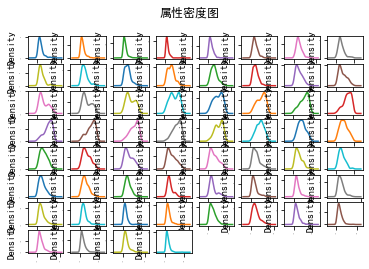

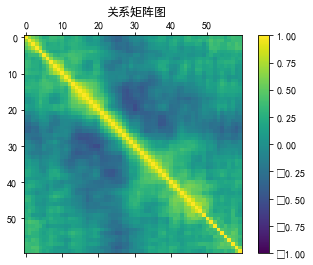

In [4]:
# 直方图
dataset.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1)
pyplot.suptitle("属性直方图")
pyplot.show()

# 密度图
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.suptitle("属性密度图")
pyplot.show()

# 关系矩阵图
fig = pyplot.figure()
fig.suptitle('关系矩阵图')
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

# 3.分离数据集

训练集：训练、验证  
测试集：测试。看看模型的泛化能力

【0.75-0.8】训练、验证；【0.2-0.25】测试  
分开：属性与目标值  

交叉验证：10份中9份训练、1份验证；10次  10折交叉验证，K折交叉验证、留一交叉验证  

In [22]:
from sklearn.model_selection import train_test_split
# 分离评估数据集
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.25
seed = 7 # 随机数种子
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 4.构建算法与算法评估准则

6个简单算法的使用  
分类问题，用准确率评分  
使用10折交叉验证  

In [23]:
from sklearn.linear_model          import LogisticRegression
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
num_folds = 10

## 4.1使用原始数据做模型

In [24]:
# 评估算法的基准
seed = 7

# 评估算法：使用原始数据 - 原始数据
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))
    
print('明细结果：')
print(results)

LR : 0.749167 (0.081048)
LDA : 0.782083 (0.094594)
KNN : 0.815000 (0.091973)
CART : 0.744583 (0.136461)
NB : 0.652083 (0.177641)
SVM : 0.774167 (0.107526)
明细结果：
[array([0.6875    , 0.75      , 0.875     , 0.8125    , 0.8125    ,
       0.6875    , 0.66666667, 0.66666667, 0.66666667, 0.86666667]), array([0.875     , 0.9375    , 0.75      , 0.8125    , 0.6875    ,
       0.625     , 0.8       , 0.66666667, 0.8       , 0.86666667]), array([0.75      , 0.75      , 0.8125    , 0.75      , 0.9375    ,
       0.75      , 0.86666667, 0.66666667, 0.93333333, 0.93333333]), array([0.5       , 0.8125    , 0.75      , 0.875     , 0.6875    ,
       0.6875    , 0.8       , 0.93333333, 0.53333333, 0.86666667]), array([0.8125    , 0.4375    , 0.6875    , 1.        , 0.625     ,
       0.625     , 0.46666667, 0.4       , 0.66666667, 0.8       ]), array([0.8125    , 1.        , 0.8125    , 0.75      , 0.8125    ,
       0.6875    , 0.73333333, 0.66666667, 0.6       , 0.86666667])]


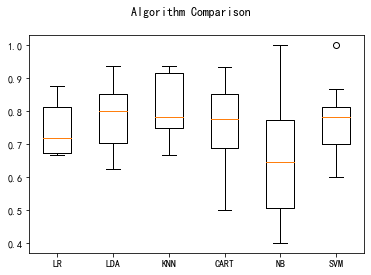

In [25]:
# 评估算法：使用原始数据 - 箱线图
# 准确率图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

## 4.2使用正态化数据做模型

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 评估算法：使用正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))
    
print('明细结果：')
print(results)

ScalerLR : 0.769167 (0.065648)
ScalerLDA : 0.782083 (0.094594)
ScalerKNN : 0.789167 (0.068546)
ScalerCART : 0.726250 (0.127313)
ScalerNB : 0.652083 (0.177641)
ScalerSVM : 0.819583 (0.082497)
明细结果：
[array([0.6875    , 0.75      , 0.8125    , 0.75      , 0.875     ,
       0.75      , 0.66666667, 0.73333333, 0.8       , 0.86666667]), array([0.875     , 0.9375    , 0.75      , 0.8125    , 0.6875    ,
       0.625     , 0.8       , 0.66666667, 0.8       , 0.86666667]), array([0.8125    , 0.75      , 0.75      , 0.875     , 0.6875    ,
       0.75      , 0.8       , 0.73333333, 0.8       , 0.93333333]), array([0.5       , 0.75      , 0.6875    , 0.875     , 0.625     ,
       0.625     , 0.73333333, 0.93333333, 0.66666667, 0.86666667]), array([0.8125    , 0.4375    , 0.6875    , 1.        , 0.625     ,
       0.625     , 0.46666667, 0.4       , 0.66666667, 0.8       ]), array([0.8125    , 0.8125    , 0.9375    , 0.9375    , 0.8125    ,
       0.75      , 0.73333333, 0.86666667, 0.66666667, 

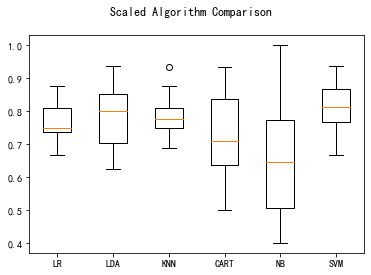

In [27]:
# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

## 4.3调整模型参数
使用网格搜索的方式处理超参数

In [11]:
from sklearn.model_selection import GridSearchCV

### 4.3.1KNN算法调参

In [28]:
# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]} # 之前没有写过，会有默认值吗？
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.83375 使用{'n_neighbors': 1}
0.833750 (0.058257) with {'n_neighbors': 1}
0.832917 (0.059554) with {'n_neighbors': 3}
0.788750 (0.070761) with {'n_neighbors': 5}
0.748333 (0.107031) with {'n_neighbors': 7}
0.710833 (0.085192) with {'n_neighbors': 9}
0.710833 (0.087066) with {'n_neighbors': 11}
0.730417 (0.113606) with {'n_neighbors': 13}
0.699167 (0.098879) with {'n_neighbors': 15}
0.705417 (0.098831) with {'n_neighbors': 17}
0.711250 (0.092610) with {'n_neighbors': 19}
0.731250 (0.095110) with {'n_neighbors': 21}


### 4.3.2SVM算法调参

In [29]:
# 调参改进算法 - SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8391666666666666 使用{'C': 1.5, 'kernel': 'rbf'}
0.762083 (0.088417) with {'C': 0.1, 'kernel': 'linear'}
0.605417 (0.176964) with {'C': 0.1, 'kernel': 'poly'}
0.531250 (0.074448) with {'C': 0.1, 'kernel': 'rbf'}
0.711250 (0.060612) with {'C': 0.1, 'kernel': 'sigmoid'}
0.737083 (0.078272) with {'C': 0.3, 'kernel': 'linear'}
0.702917 (0.145655) with {'C': 0.3, 'kernel': 'poly'}
0.744167 (0.110996) with {'C': 0.3, 'kernel': 'rbf'}
0.762083 (0.083238) with {'C': 0.3, 'kernel': 'sigmoid'}
0.730417 (0.076127) with {'C': 0.5, 'kernel': 'linear'}
0.755417 (0.155121) with {'C': 0.5, 'kernel': 'poly'}
0.756667 (0.067268) with {'C': 0.5, 'kernel': 'rbf'}
0.755833 (0.086205) with {'C': 0.5, 'kernel': 'sigmoid'}
0.730417 (0.094447) with {'C': 0.7, 'kernel': 'linear'}
0.767917 (0.148664) with {'C': 0.7, 'kernel': 'poly'}
0.813333 (0.089594) with {'C': 0.7, 'kernel': 'rbf'}
0.749583 (0.084110) with {'C': 0.7, 'kernel': 'sigmoid'}
0.723750 (0.100848) with {'C': 0.9, 'kernel': 'linear'}
0.780000 (0.

# 5.使用集成算法

## 5.1集成算法模型构建

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 集成算法
ensembles = {}

ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])

results = []

for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScaledAB: 0.846250 (0.077761)
ScaledGBM: 0.825833 (0.094056)
ScaledRF: 0.807500 (0.083911)
ScaledET: 0.858333 (0.075208)


## 5.2集成算法箱线图

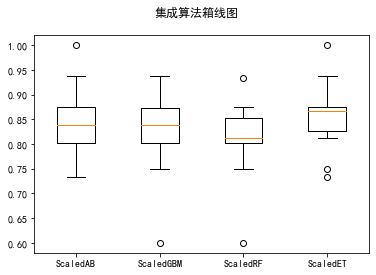

In [31]:
# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('集成算法箱线图')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

## 5.3集成算法调参

### 5.3.1 GBM算法调参

In [32]:
# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8383333333333333 使用{'n_estimators': 200}


### 5.3.2 极端决策树算法调参

In [33]:
# 集成算法ETR - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.9029166666666667 使用{'n_estimators': 600}


# 6.确定模型

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # 周志华《机器学习》，第1、2章
# 模型最终化
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(X=rescaledX, y=Y_train)

# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9038461538461539
[[27  3]
 [ 2 20]]
              precision    recall  f1-score   support

           M       0.93      0.90      0.92        30
           R       0.87      0.91      0.89        22

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52

